In [1]:
import numpy as np
from grid import Grid

g = Grid()
g.print()

-------------------------------
| 0,0 | 1,0 | 2,0 | 3,0 | 4,0 | 
-------------------------------
| 0,1 | 1,1 | 2,1 | 3,1 | 4,1 | 
-------------------------------
| 0,2 | 1,2 | 2,2 | 3,2 | 4,2 | 
-------------------------------
| 0,3 | 1,3 | 2,3 | 3,3 | 4,3 | 
-------------------------------
| 0,4 | 1,4 | 2,4 | 3,4 | 4,4 | 
-------------------------------


# Human Tests

In [2]:
from actors import Human

h = Human(g)
h.run()

Steps: 6
Rewards: 10
---------------------
|   |   |   |   |   | 
---------------------
|   |   |   |   |   | 
---------------------
|   |   |   |   |   | 
---------------------
|   |   |   | o |   | 
---------------------
|   |   |   |   |   | 
---------------------
(3, 3)


# AI

In [3]:
from actors import QLearning

q = QLearning(g)
q.run()

print('Steps:', q.steps)
print('Rewards:', q.totalReward)


Steps: 3587
Rewards: -67


In [4]:
for episodes in range(500):
    q.resetCount()
    q.run()

print('Episodes:', episodes)
print('Steps:', q.steps)
print('Rewards:', q.totalReward)

Episodes: 499
Steps: 6
Rewards: 10


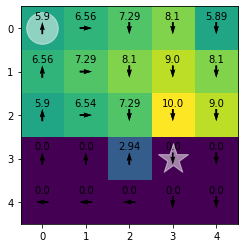

In [5]:
x = q.plot()

In [6]:
from actors import DynaQ

d = DynaQ(g)
d.run()

print('Steps:', d.steps)
print('Rewards:', d.totalReward)

Steps: 18897
Rewards: -405


In [7]:
for episodes in range(500):
    d.resetCount()
    d.run()

print('Episodes:', episodes)
print('Steps:', d.steps)
print('Rewards:', d.totalReward)

Episodes: 499
Steps: 6
Rewards: 10


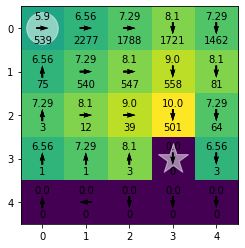

In [8]:
d.plot()

[[ 0.4612968  -0.2707699   1.14820292 -0.95486565 -1.80200727 -0.47212474
   1.03080374 -1.43860755  0.30819429  0.58226114]
 [-0.19342346  0.46507161 -0.05026419  0.93139264 -0.56519776 -1.51070607
   0.74415636 -0.39546251 -0.52180703  0.84822714]]


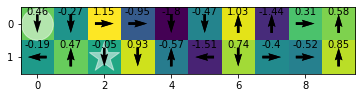

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

fig = plt.figure()
ax = fig.gca()

v = np.array([
    np.random.normal(size=10), 
    np.random.normal(size=10)
])

xr = range(v.shape[1])
yr = range(v.shape[0])

actions = [(0, +1), (+1, 0), (0, -1), (-1, 0)]
arrows = np.array([random.choice(actions) for _ in range(v.shape[1]) for _ in range(v.shape[0])])
arrows = arrows.reshape([v.shape[1], v.shape[0], 2])

ax.imshow(v)
x = ax.quiver(xr, yr, arrows[:, :, 0].T, arrows[:, :, 1].T, pivot='mid')
# 
for iy, ix in np.ndindex(v.shape):
    angle = math.atan2(arrows[ix, iy, 1], arrows[ix, iy, 0]) * 180 / math.pi 
    ax.quiverkey(x, ix, iy, 1, label=f'{round(v[iy, ix], 2)}', angle=angle, labelpos='N', coordinates='data')


plt.scatter(0, 0, marker='o', s=1000, c='w', alpha=0.5)
plt.scatter(2, 1, marker='*', s=1000, c='w', alpha=0.5)
print(v)